<a href="https://colab.research.google.com/github/Juan-Olarte/lstm-renewable-olarte/blob/main/forecasting_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar el dataset desde drive

# Pre procesamiento de los datos

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib as plt

#montar el drive
drive.mount('/content/drive', force_remount=True)

ruta = '/content/drive/MyDrive/Forecasting_Renewables/datasets/RENEWABLE_POWER_NASA.csv'
df = pd.read_csv(ruta)
df

Mounted at /content/drive


,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,SZA,T2M,PS,WS50M,WD50M,WSC
0,2020,1,1,0,0.0,0.0,0.0,0.0,-999.0,90.0,22.94,92.88,1.49,148.8,1.67
1,2020,1,1,1,0.0,0.0,0.0,0.0,-999.0,90.0,22.56,92.83,1.06,138.1,1.18
2,2020,1,1,2,0.0,0.0,0.0,0.0,-999.0,90.0,22.10,92.79,0.98,115.5,1.10
3,2020,1,1,3,0.0,0.0,0.0,0.0,-999.0,90.0,21.54,92.78,0.96,107.5,1.07
4,2020,1,1,4,0.0,0.0,0.0,0.0,-999.0,90.0,21.09,92.79,0.95,117.6,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2023,12,31,19,0.0,0.0,0.0,0.0,-999.0,90.0,23.90,93.02,2.06,37.3,2.30
35060,2023,12,31,20,0.0,0.0,0.0,0.0,-999.0,90.0,23.48,93.08,1.97,29.8,2.20
35061,2023,12,31,21,0.0,0.0,0.0,0.0,-999.0,90.0,23.02,93.12,2.22,14.8,2.48
35062,2023,12,31,22,0.0,0.0,0.0,0.0,-999.0,90.0,22.44,93.10,2.56,5.2,2.86


para la visualizacion del dataset y el analisis exploratorio, convertir la columna date time de object a formato datetime

In [ ]:
#verificar que es object
df.dtypes

,0
YEAR,int64
MO,int64
DY,int64
HR,int64
ALLSKY_SFC_SW_DWN,float64
CLRSKY_SFC_SW_DWN,float64
ALLSKY_SFC_SW_DNI,float64
ALLSKY_SFC_SW_DIFF,float64
ALLSKY_KT,float64
SZA,float64


In [ ]:
def create_datetime(row):
  year = int(row.YEAR)
  month = int(row.MO)
  day = int(row.DY)
  hour = int(row.HR)
  return pd.to_datetime(f"{year}-{month:02}-{day:02} {hour:02}:{00}:{00}")

df['datetime'] = df.apply(create_datetime, axis=1)
df = df.set_index('datetime')
df.sort_index(inplace=True)
df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)
df

,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,SZA,T2M,PS,WS50M,WD50M,WSC
datetime,,,,,,,,,,,,
2020-01-01 00:00:00,0,0.0,0.0,0.0,0.0,-999.0,90.0,22.94,92.88,1.49,148.8,1.67
2020-01-01 01:00:00,1,0.0,0.0,0.0,0.0,-999.0,90.0,22.56,92.83,1.06,138.1,1.18
2020-01-01 02:00:00,2,0.0,0.0,0.0,0.0,-999.0,90.0,22.10,92.79,0.98,115.5,1.10
2020-01-01 03:00:00,3,0.0,0.0,0.0,0.0,-999.0,90.0,21.54,92.78,0.96,107.5,1.07
2020-01-01 04:00:00,4,0.0,0.0,0.0,0.0,-999.0,90.0,21.09,92.79,0.95,117.6,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,19,0.0,0.0,0.0,0.0,-999.0,90.0,23.90,93.02,2.06,37.3,2.30
2023-12-31 20:00:00,20,0.0,0.0,0.0,0.0,-999.0,90.0,23.48,93.08,1.97,29.8,2.20
2023-12-31 21:00:00,21,0.0,0.0,0.0,0.0,-999.0,90.0,23.02,93.12,2.22,14.8,2.48


**VARIABLES**

```
-BEGIN HEADER-
NASA/POWER Source Native Resolution Daily Data
Dates (month/day/year): 01/01/2010 through 12/31/2023 in LST
Location: latitude  7.8455   longitude -72.5678
elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 741.14 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999
parameter(s):
ALLSKY_SFC_SW_DWN      CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day)
CLRSKY_SFC_SW_DWN      CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day)
ALLSKY_SFC_SW_DNI      CERES SYN1deg All Sky Surface Shortwave Downward Direct Normal Irradiance (kW-hr/m^2/day)
ALLSKY_SFC_SW_DIFF     CERES SYN1deg All Sky Surface Shortwave Diffuse Irradiance (kW-hr/m^2/day)
ALLSKY_SFC_LW_DWN      CERES SYN1deg All Sky Surface Longwave Downward Irradiance (kW-hr/m^2/day)
ALLSKY_KT              CERES SYN1deg All Sky Insolation Clearness Index (dimensionless)
T2M                    MERRA-2 Temperature at 2 Meters (C)
WS50M                  MERRA-2 Wind Speed at 50 Meters (m/s)
WS50M_MAX              MERRA-2 Wind Speed at 50 Meters Maximum (m/s)
WS50M_MIN              MERRA-2 Wind Speed at 50 Meters Minimum (m/s)
WS50M_RANGE            MERRA-2 Wind Speed at 50 Meters Range (m/s)
WD50M                  MERRA-2 Wind Direction at 50 Meters (Degrees)
PS                     MERRA-2 Surface Pressure (kPa)
T2M_RANGE              MERRA-2 Temperature at 2 Meters Range (C)
-END HEADER-
```


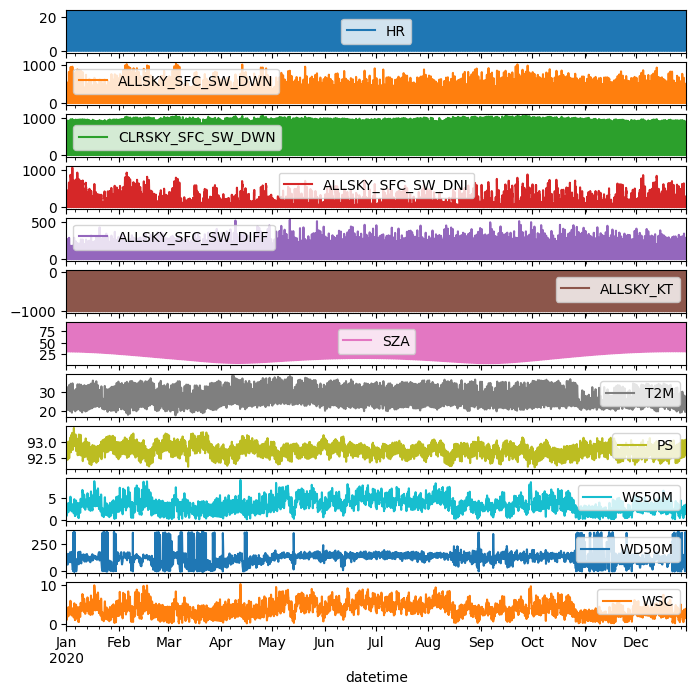

In [ ]:
#dibujar variables
cols = df.columns

# graficar la totalidad de datos
#N = df.shape[0]
N = 365*24
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(8, 8))

Revisar si hay datos faltantes, valores nulos o duplicados. Para este dataset, -999 representa un dato nulo.

In [ ]:
print('Cantidad de NaNs:')
for column in df:
  nans = df[column].isna().sum()
  print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna ALLSKY_SFC_SW_DWN: 0
	Columna CLRSKY_SFC_SW_DWN: 0
	Columna ALLSKY_SFC_SW_DNI: 0
	Columna ALLSKY_SFC_SW_DIFF: 0
	Columna ALLSKY_KT: 0
	Columna SZA: 0
	Columna T2M: 0
	Columna WS50M: 0
	Columna WSC: 0


Como el dataset incluye valores de  las 24h del dia, algunos posibles errores pueden darse al querer mirar magnitudes relacionadas con la radiación solar de noche

In [ ]:
df = df.replace(-999, 0)
df.head()

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,SZA,T2M,WS50M,WSC
datetime,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.94,1.49,1.67
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.56,1.06,1.18
2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.10,0.98,1.10
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.54,0.96,1.07
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.09,0.95,1.06


In [ ]:
df.duplicated().sum()

np.int64(482)

ANALIZAR PERIODICIDAD

In [ ]:
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
3600.0    35063
Name: count, dtype: int64


Revisión final de los datos

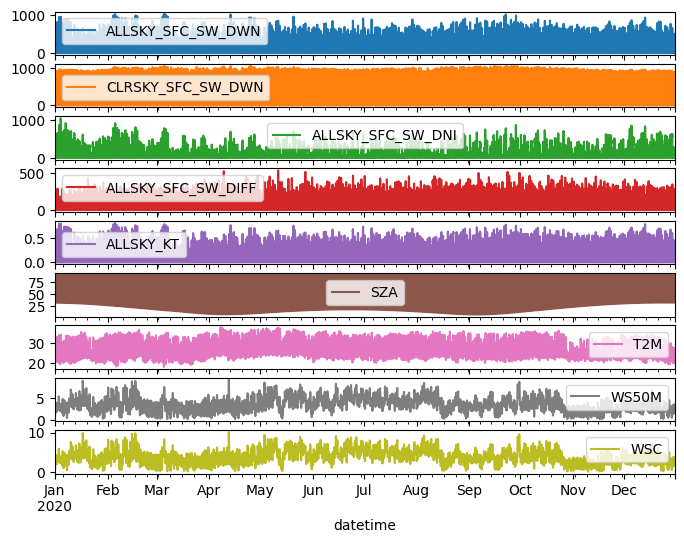

In [ ]:
#dibujar variables
cols = df.columns

# graficar la totalidad de datos
N = 365*24
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(8, 6))

In [ ]:
print(df.columns)

Index(['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DNI',
       'ALLSKY_SFC_SW_DIFF', 'ALLSKY_KT', 'SZA', 'T2M', 'WS50M', 'WSC'],
      dtype='object')


```
NASA/POWER Source Native Resolution Hourly Data
Dates (month/day/year): 01/01/2020 through 12/31/2023 in LST
Location: Latitude  7.8715   Longitude -72.5367
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 741.14 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999
Parameter(s):
ALLSKY_SFC_SW_DWN      CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (Wh/m^2)
CLRSKY_SFC_SW_DWN      CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (Wh/m^2)
ALLSKY_SFC_SW_DNI      CERES SYN1deg All Sky Surface Shortwave Downward Direct Normal Irradiance (Wh/m^2)
ALLSKY_SFC_SW_DIFF     CERES SYN1deg All Sky Surface Shortwave Diffuse Irradiance (Wh/m^2)
ALLSKY_KT              CERES SYN1deg All Sky Insolation Clearness Index (dimensionless)
SZA                    CERES SYN1deg Solar Zenith Angle (Degrees)
T2M                    MERRA-2 Temperature at 2 Meters (C)
WS50M                  MERRA-2 Wind Speed at 50 Meters (m/s)
WSC                    MERRA-2 Corrected Wind Speed (Adjusted For Elevation) (m/s)
```

Dividir dataset en dos sub datasets, uno para energía basada en el viento y otro para energía basada en radiación solar

In [ ]:
#variables de sol
solar_power = ['ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_SW_DNI','ALLSKY_SFC_SW_DIFF','ALLSKY_KT','SZA','T2M',]

solar_power_df = df[solar_power]
solar_power_df

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,SZA,T2M
datetime,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.94
2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.56
2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.10
2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.54
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.09
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,90.0,23.90
2023-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,90.0,23.48
2023-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,90.0,23.02


In [ ]:
#Guardar
df.to_csv('/content/drive/MyDrive/Forecasting_Renewables/datasets/renewable_power_dataset_preprocesado.csv', index=True)
print("guardado exitoso")

guardado exitoso


# Matriz de correlación

La matriz de correlación muestra la relación entre las variables del dataset. Cada valor representa el coeficiente de correlación de Pearson (-1 a 1):

Valores cercanos a 1: Correlación positiva fuerte (ambas variables aumentan o disminuyen juntas).
Valores cercanos a -1: Correlación negativa fuerte (una variable aumenta mientras la otra disminuye).
Valores cercanos a 0: No hay correlación significativa.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.read_csv('/content/drive/MyDrive/Forecasting_Renewables/datasets/renewable_power_dataset_preprocesado.csv')
df2.head()

,datetime,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,ALLSKY_KT,SZA,T2M,WS50M,WSC
0,2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.94,1.49,1.67
1,2020-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.56,1.06,1.18
2,2020-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,90.0,22.10,0.98,1.10
3,2020-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.54,0.96,1.07
4,2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,90.0,21.09,0.95,1.06


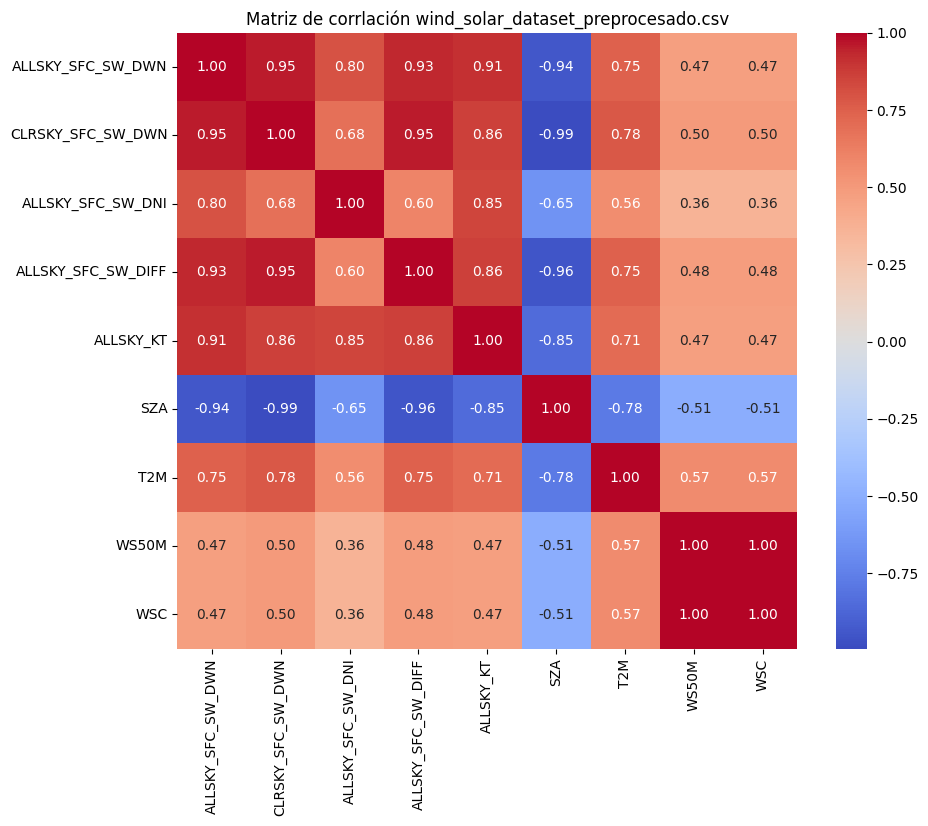

In [ ]:
#calcular la correlación
correlation_matrix = df2.corr(numeric_only=True)
if correlation_matrix.empty:
  print("No se pudo calcular la matriz de correlación.")
else:
  # Crear el mapa de calor
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title("Matriz de corrlación wind_solar_dataset_preprocesado.csv")
  plt.show()

# Pre-Procesamiento del modelo

1. Partir los datos en train/val/test
2. Dataset supervisado de in and out
3. Escalamiento entre 0 y 1

1. Partición de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

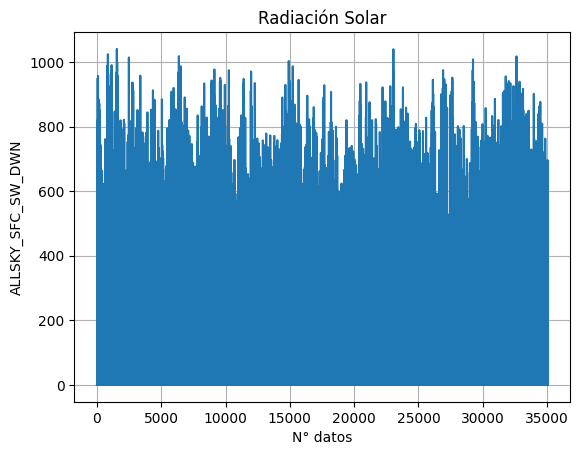

In [4]:
# plottear la variable para el forecasting, en este caso será Radiación Solar
# Incidente
df3 = pd.read_csv('/content/drive/MyDrive/Forecasting_Renewables/datasets/renewable_power_dataset_preprocesado.csv')
serie = df3['ALLSKY_SFC_SW_DWN'].values.astype(float)
serie = serie.reshape(-1,1)
plt.plot(serie)
plt.title('Radiación Solar')
plt.xlabel('N° datos')
plt.ylabel('ALLSKY_SFC_SW_DWN')
plt.grid()
plt.show()

In [5]:
def train_val_test_splitter(serie, tr_size=0.7, vl_size=0.15):
    """
    Divide una serie temporal en conjuntos de entrenamiento, validación y prueba.

    Args: serie de datos, proporción de datos para entrenamiento, proporción de datos para validación.

    Returns: conjuntos de entrenamiento, validación y prueba.
    """
    n = serie.shape[0]
    train_n = int(n * tr_size)
    val_n = int(n * vl_size)
    test_n = n - train_n - val_n

    train = serie[0:train_n]
    val = serie[train_n:train_n+val_n]
    test = serie[train_n+val_n:]

    return train, val, test

train, val, test = train_val_test_splitter(df3.ALLSKY_SFC_SW_DWN)
print(f'Tamaño train: {len(train)}, Tamaño val: {len(val)}, Tamaño test: {len(test)}')

Tamaño train: 24544, Tamaño val: 5259, Tamaño test: 5261


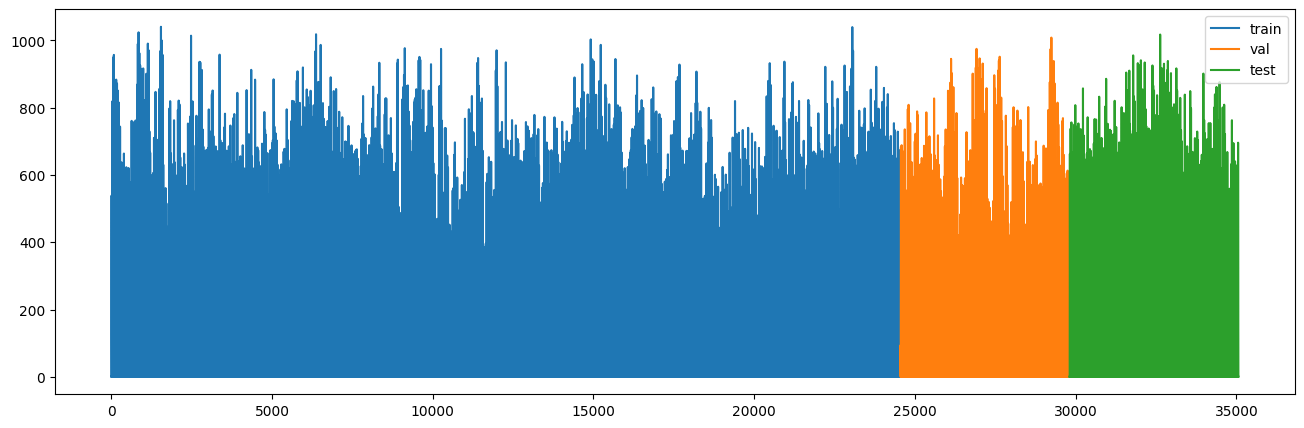

In [6]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(train, label='train')
ax.plot(val, label='val')
ax.plot(test, label='test')
plt.legend()

In [7]:

def create_supervised_dataset(serie, input_lenght, output_lenght):
    """
    Crea un conjunto de datos supervisado para predicción de series temporales.

    Args: serie de datos, número de pasos de entrada.
    Returns: conjunto de datos supervisado.
    """
    X, Y = [], []
    serie = serie.values.astype(float)
    shape = serie.shape
    if len(shape)==1:
      fils, cols = serie.shape[0], 1
      serie = serie.reshape(fils,cols)
    else: #multivariable
      fils, cols = serie.shape

    for i in range(fils-input_lenght-output_lenght):
      X.append(serie[i:i+input_lenght,0:cols])
      # Check if the slice is empty before reshaping
      target_slice = serie[i+input_lenght:i+input_lenght+output_lenght, -1]
      if target_slice.size > 0:  # Only reshape if the slice is not empty
        Y.append(target_slice.reshape(output_lenght, 1))
      else:
        # Handle the case where the slice is empty (e.g., skip, fill with a default value)
        # For this example, I'll skip the empty slice
        continue

    X = np.array(X)
    Y = np.array(Y)
    return X, Y

input_lenght = 24
output_lenght = 1   #MODIFICAR LA CANTIDAD DE DATOS DE SALIDA
X_train, Y_train = create_supervised_dataset(train, input_lenght, output_lenght)
X_val, Y_val = create_supervised_dataset(val, input_lenght, output_lenght)
X_test, Y_test = create_supervised_dataset(test, input_lenght, output_lenght)

print(f'Tamaño X_train: {X_train.shape}, Tamaño y_train: {Y_train.shape}')
print(f'Tamaño X_val: {X_val.shape}, Tamaño y_val: {Y_val.shape}')
print(f'Tamaño X_test: {X_test.shape}, Tamaño y_test: {Y_test.shape}')

Tamaño X_train: (24519, 24, 1), Tamaño y_train: (24519, 1, 1)
Tamaño X_val: (5234, 24, 1), Tamaño y_val: (5234, 1, 1)
Tamaño X_test: (5236, 24, 1), Tamaño y_test: (5236, 1, 1)


3. Escalamiento

In [8]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
  '''
  escqla el dataset en el rango -1 a 1

  entrada:
  data_input: dataset a escalar
  data_input = {'X_train':X_train, 'Y_train':Y_train, 'X_val'}
  salida:
  data_scaled: dataset escalado
  scaler: objeto scaler
  '''
  NFEATS = data_input['X_train'].shape[2]
  #lista de escaladores
  scalers = [MinMaxScaler(feature_range=(-1, 1)) for i in range(NFEATS)]
  #inicializar
  X_train_scaled = np.zeros(data_input['X_train'].shape)
  X_val_scaled = np.zeros(data_input['X_val'].shape)
  X_test_scaled = np.zeros(data_input['X_test'].shape)
  Y_train_scaled = np.zeros(data_input['Y_train'].shape)
  Y_val_scaled = np.zeros(data_input['Y_val'].shape)
  Y_test_scaled = np.zeros(data_input['Y_test'].shape)

  #escalamiento
  for i in range(NFEATS):
    X_train_scaled[:,:,i] = scalers[i].fit_transform(data_input['X_train'][:,:,i])
    X_val_scaled[:,:,i] = scalers[i].transform(data_input['X_val'][:,:,i])
    X_test_scaled[:,:,i] = scalers[i].transform(data_input['X_test'][:,:,i])

  #escalamiento ys
  Y_train_scaled = scalers[-1].fit_transform(Y_train[:,:,0])
  Y_val_scaled = scalers[-1].transform(Y_val[:,:,0])
  Y_test_scaled = scalers[-1].transform(Y_test[:,:,0])

  #diccionario de salida
  data_scaled = {
      'X_train_s':X_train_scaled, 'Y_train_s':Y_train_scaled,
      'X_val_s':X_val_scaled, 'Y_val_s':Y_val_scaled,
      'X_test_s':X_test_scaled, 'Y_test_s':Y_test_scaled
      }
  return data_scaled, scalers[0]

In [9]:
#crear entrada

data_in = {
    'X_train':X_train, 'Y_train':Y_train,
    'X_val':X_val, 'Y_val':Y_val,
    'X_test':X_test, 'Y_test':Y_test
}

#escalar
data_scaled, scaler = escalar_dataset(data_in)

#extraer subsets escalados
X_train_s, Y_train_s = data_scaled['X_train_s'], data_scaled['Y_train_s']
X_val_s, Y_val_s = data_scaled['X_val_s'], data_scaled['Y_val_s']
X_test_s, Y_test_s = data_scaled['X_test_s'], data_scaled['Y_test_s']

#verificar

print(f'Tamaño minimo X_train: {X_train.min()}/{X_val.min()}/{X_test.min()}')
print(f'Tamaño minimo X_train_s: {X_train_s.min()}/{X_val_s.min()}/{X_test_s.min()}')
print(f'Tamaño maximo X_train: {X_train.max()}/{X_val.max()}/{X_test.max()}')
print(f'Tamaño maximo X_train_s: {X_train_s.max()}/{X_val_s.max()}/{X_test_s.max()}')

Tamaño minimo X_train: 0.0/0.0/0.0
Tamaño minimo X_train_s: -1.0/-1.0/-1.0
Tamaño maximo X_train: 1040.65/1008.47/1017.55
Tamaño maximo X_train_s: 1.0/0.9381540383414211/0.955604670158074


creación y entrenamiento

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

#ajustar parámetros de reproducibilidad
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# EL MODELO

N_UNITS = 128 #tamaño del estado oculto y la memory cell
INPUT_SHAPE = (X_train_s.shape[1], X_train_s.shape[2]) #tamaño de la entrada

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=N_UNITS, input_shape=INPUT_SHAPE,return_sequences=True),
    tf.keras.layers.LSTM(units=N_UNITS),
    tf.keras.layers.Dense(output_lenght, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 24, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:

#PERDIDA: Se usa el error medio cuadrado
def RMSE(Y_true, Y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(Y_true - Y_pred)))
    return rmse

#OPTIMIZADOR: Se usa RMSprop
optimizador = RMSprop(learning_rate=5e-5) #hiperparámetro
model.compile(
    optimizer = optimizador,
    loss = RMSE,
)

In [20]:
#Entrenamiento
EPOCHS = 128 #HIPERPARÁMETRO
BATCH_SIZE = 256 #HIPERPARÁMETRO
historia = model.fit(
    x = X_train_s,
    y = Y_train_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_val_s, Y_val_s),
    verbose = 2
)

Epoch 1/128
96/96 - 4s - 46ms/step - loss: 0.5528 - val_loss: 0.4639
Epoch 2/128
96/96 - 1s - 9ms/step - loss: 0.4180 - val_loss: 0.3211
Epoch 3/128
96/96 - 1s - 9ms/step - loss: 0.2691 - val_loss: 0.2418
Epoch 4/128
96/96 - 1s - 8ms/step - loss: 0.2418 - val_loss: 0.2301
Epoch 5/128
96/96 - 1s - 13ms/step - loss: 0.2316 - val_loss: 0.2192
Epoch 6/128
96/96 - 1s - 12ms/step - loss: 0.2216 - val_loss: 0.2085
Epoch 7/128
96/96 - 1s - 8ms/step - loss: 0.2113 - val_loss: 0.1976
Epoch 8/128
96/96 - 1s - 13ms/step - loss: 0.1999 - val_loss: 0.1856
Epoch 9/128
96/96 - 1s - 13ms/step - loss: 0.1866 - val_loss: 0.1736
Epoch 10/128
96/96 - 1s - 12ms/step - loss: 0.1726 - val_loss: 0.1635
Epoch 11/128
96/96 - 1s - 14ms/step - loss: 0.1600 - val_loss: 0.1510
Epoch 12/128
96/96 - 1s - 9ms/step - loss: 0.1504 - val_loss: 0.1400
Epoch 13/128
96/96 - 1s - 10ms/step - loss: 0.1429 - val_loss: 0.1313
Epoch 14/128
96/96 - 1s - 13ms/step - loss: 0.1365 - val_loss: 0.1337
Epoch 15/128
96/96 - 1s - 11ms/ste

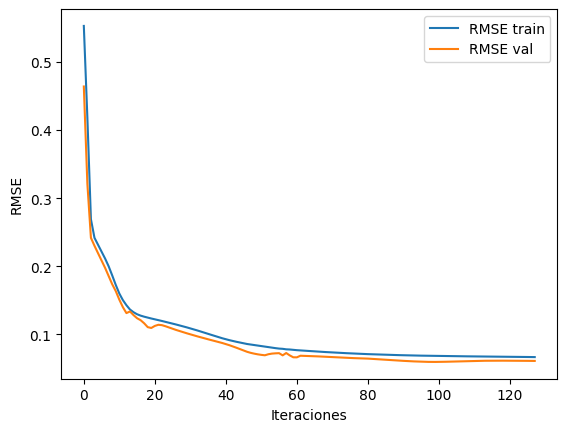

In [21]:
#graficar curvas de entrenamiento y validación
plt.plot(historia.history['loss'], label='RMSE train')
plt.plot(historia.history['val_loss'], label='RMSE val')
plt.xlabel('Iteraciones')
plt.ylabel('RMSE')
plt.legend()
plt.show()

evaluar desempeño

In [22]:
#cálculo rmse para los 3 subsets
rmse_tr = model.evaluate(x=X_train_s, y=Y_train_s, verbose=0)
rmse_vl = model.evaluate(x=X_val_s, y=Y_val_s, verbose=0)
rmse_ts = model.evaluate(x=X_test_s, y=Y_test_s, verbose=0)

print('COMPARATIVO')
print(f'RMSE train: {rmse_tr:.4f}')
print(f'RMSE val: {rmse_vl:.4f}')
print(f'RMSE test: {rmse_ts:.4f}')

COMPARATIVO
RMSE train: 0.0635
RMSE val: 0.0593
RMSE test: 0.0637


# Predicciones

In [23]:
def prediccion(x, model, scaler):
  '''
  realiza predicciones de OUTPUT_LENGHT instantes

  entrada:
  x: batches de datos ( tamaño = BATCHES X INPUT_LENGHT X FEATURES)
  model: modelo entrenado
  scaler: escalador (para des-escalar la predicción)

  salida:
  y_pred: predicciones (tamaño = BATCHES X OUTPUT_LENGHT)
  '''
  y_pred_s = model.predict(x,verbose=0) #predicciones escaladas
  y_pred = scaler.inverse_transform(y_pred_s) #desescalar

  return y_pred.flatten()

In [24]:
y_ts_pred = prediccion(X_train_s, model, scaler)

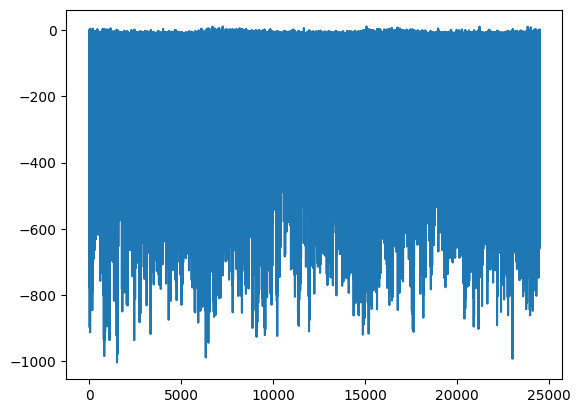

In [25]:
  N = len(y_ts_pred)
  ndato = np.linspace(1,N,N)

  errores = Y_train_s.flatten() - y_ts_pred.flatten()
  plt.plot(errores);